In [1]:
import warnings
warnings.simplefilter(action='ignore',)

import multiprocessing
import multiprocessing as mp
from time import time
from multiprocessing import Queue
print("Number of cpu : ", multiprocessing.cpu_count())

from pylab import cm
from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.colors
import matplotlib.pyplot as plt

from qiskit import Aer, QuantumCircuit
from qiskit.utils import QuantumInstance
from qiskit.circuit import ParameterVector
from qiskit_machine_learning.kernels import QuantumKernel
quantum_instance = QuantumInstance(Aer.get_backend('statevector_simulator'), shots=128)

import sys 
sys.path.append('..')
from time import time
from circuit_generate import generate_circuit_2local

import seaborn as sns
from sklearn import datasets
from sklearn.svm import SVC
sns.set_style("darkgrid")

from utils import train_test_split, QKTCallback

Number of cpu :  12


In [2]:
DATA_FILEPATH = "dataset_graph7.csv"
train_x, train_y, test_x, test_y = train_test_split(DATA_FILEPATH)

In [3]:
MODE = "2local"

QUBIT = 7
FEATURE = 14
BIT = 5 if MODE == "paper" else 6

GENE = 40
POPULATION = multiprocessing.cpu_count() # 12

POOLSIZE = 4
OFFSPRINGSIZE = POPULATION - POOLSIZE

PROB = 32
MUTATION_PROB = PROB/GENE

GENERATION = 200
EARLYSTOP = 24

In [4]:
W = 80

def cost_func(acc, r, h, cnot, swap=0):
    
    if acc == 0.0: acc = 0.01
    gate_cost = r + 2*h + 5*cnot+11*swap
    fit = gate_cost + W / acc**2 - W
    return round(fit,1)

def cost_gate(r,h,cnot,swap=0): return r+2*h+5*cnot+11*swap

In [5]:
def task(i, pop, q, mode):
    if mode == "2local": qc_i, r_i, h_i, cnot_i = generate_circuit_2local(pop[i], QUBIT, FEATURE)
    kernel = QuantumKernel(feature_map=qc_i, quantum_instance=quantum_instance,)
    model = SVC(kernel=kernel.evaluate)
    model.fit(train_x, train_y)
    score = model.score(test_x, test_y)
    if mode == "2local": q.put([score, r_i, h_i, cnot_i])


Generation: 1 , Cost: 297.02 , Time: 7.27 s
Accuracy: [0.55, 0.55, 0.35, 0.8, 0.55, 0.7, 0.35, 0.6, 0.75, 0.55, 0.65, 0.85]
Fitness: [244.5, 215.5, 636.1, 92.0, 258.5, 151.3, 609.1, 178.2, 111.2, 224.5, 176.3, 78.7]

Generation: 2 , Cost: 108.3 , Time: 14.65 s
Accuracy: [0.85, 0.8, 0.75, 0.7, 0.8, 0.45, 0.65, 0.4, 0.7, 0.7, 0.65, 0.75]
Fitness: [78.7, 92.0, 111.2, 151.3, 91.0, 390.1, 160.3, 466.0, 132.3, 129.3, 160.3, 103.2]

Generation: 3 , Cost: 91.22 , Time: 21.93 s
Accuracy: [0.85, 0.8, 0.8, 0.75, 0.85, 0.75, 0.75, 0.6, 0.65, 0.75, 0.5, 0.75]
Fitness: [78.7, 91.0, 92.0, 103.2, 61.7, 102.2, 100.2, 186.2, 149.3, 106.2, 306.0, 105.2]

Generation: 4 , Cost: 80.85 , Time: 29.17 s
Accuracy: [0.85, 0.85, 0.8, 0.8, 0.8, 0.6, 0.65, 0.65, 0.9, 0.55, 0.7, 0.7]
Fitness: [61.7, 78.7, 91.0, 92.0, 101.0, 188.2, 161.3, 150.3, 60.8, 208.5, 132.3, 123.3]

Generation: 5 , Cost: 73.05 , Time: 36.51 s
Accuracy: [0.9, 0.85, 0.85, 0.8, 0.45, 0.25, 0.55, 0.8, 0.55, 0.7, 0.75, 0.7]
Fitness: [60.8, 61.7, 7


Generation: 40 , Cost: 49.82 , Time: 290.29 s
Accuracy: [1.0, 0.95, 1.0, 0.85, 0.7, 0.5, 0.9, 0.7, 0.75, 0.6, 0.5, 0.65]
Fitness: [39.0, 51.6, 52.0, 56.7, 129.3, 258.0, 69.8, 125.3, 114.2, 187.2, 268.0, 150.3]

Generation: 41 , Cost: 49.82 , Time: 297.6 s
Accuracy: [1.0, 0.95, 1.0, 0.85, 0.7, 0.7, 0.8, 0.65, 0.75, 0.7, 0.65, 0.8]
Fitness: [39.0, 51.6, 52.0, 56.7, 141.3, 122.3, 87.0, 171.3, 99.2, 131.3, 154.3, 87.0]

Generation: 42 , Cost: 49.82 , Time: 304.99 s
Accuracy: [1.0, 0.95, 1.0, 0.85, 0.7, 0.7, 0.7, 0.75, 0.55, 0.45, 0.6, 0.45]
Fitness: [39.0, 51.6, 52.0, 56.7, 114.3, 140.3, 118.3, 108.2, 229.5, 356.1, 192.2, 357.1]

Generation: 43 , Cost: 49.82 , Time: 312.24 s
Accuracy: [1.0, 0.95, 1.0, 0.85, 0.7, 0.7, 0.55, 0.4, 0.6, 0.75, 0.6, 0.8]
Fitness: [39.0, 51.6, 52.0, 56.7, 114.3, 134.3, 211.5, 461.0, 176.2, 102.2, 185.2, 91.0]

Generation: 44 , Cost: 49.82 , Time: 319.56 s
Accuracy: [1.0, 0.95, 1.0, 0.85, 0.5, 0.6, 0.6, 0.8, 0.75, 0.65, 0.7, 0.55]
Fitness: [39.0, 51.6, 52.0, 56.7

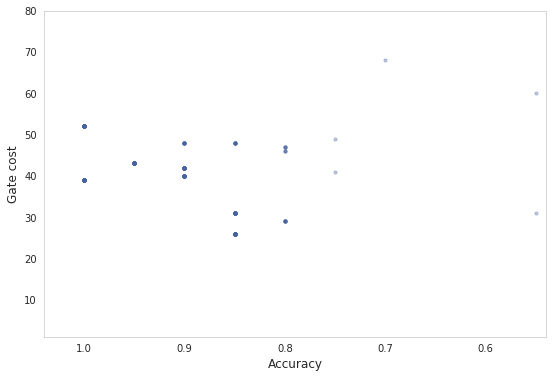

In [6]:
pop, COST, obj_GATE, obj_ACC= [], [], [], []
early_stop, threshold= 0, 100

sns.set_style("whitegrid")
plt.figure(figsize=(9,6))
plt.xlim(1.04,0.54)
plt.ylim(1,GENE*2)
plt.xlabel("Accuracy", fontsize=12)
plt.ylabel("Gate cost", fontsize=12)
plt.grid(False)

    
for i in range(POPULATION):
    genes = np.random.randint(2, size=(GENE,BIT))
    pop.append(genes)
    
start_time = time()
for g in range(GENERATION):
    
    inputs = range(POPULATION)
    process_list= []

    q_list = [Queue() for i in range(len(inputs))]
    RESULt = []

    for i in inputs:
        process_list.append(mp.Process(target = task, args = (i, pop,  q_list[i], MODE)))
        process_list[-1].start()

    for i in inputs:
        process_list[i].join()

    for q in q_list:
        RESULt.append(q.get())
    
    end_time = time()

    FITNESS, SCORE, QC_R, QC_H, QC_CNOT, QC_SWAP, plt_acc, plt_gate = [], [], [], [], [], [], [], []
    cost_pool ,obj_gate, obj_acc = 0, 0, 0

    for i in range(POPULATION):
        SCORE.append(round(RESULt[i][0],2))
        QC_R.append(RESULt[i][1])
        QC_H.append(RESULt[i][2])
        QC_CNOT.append(RESULt[i][3])
        
    for i in range(POPULATION):
        fit = cost_func(SCORE[i], QC_R[i], QC_H[i], QC_CNOT[i])
        FITNESS.append(fit)            
    
    for i in range(POOLSIZE):
        cost_p = FITNESS[i]
        obj_g = cost_gate(QC_R[i], QC_H[i], QC_CNOT[i])
        obj_a = SCORE[i]
        
        plt_gate.append(obj_g)
        plt_acc.append(obj_a)
        cost_pool += cost_p
        obj_gate += obj_g
        obj_acc += obj_a
     
    if cost_pool/POOLSIZE < threshold:
        threshold = cost_pool/POOLSIZE
        early_stop = 0    
    early_stop += 1
    
    COST.append(cost_pool/POOLSIZE)
    obj_GATE.append(obj_gate/POOLSIZE)
    obj_ACC.append(obj_acc/POOLSIZE)
    plt.scatter(plt_acc, plt_gate, s=10, c="#4863A0", alpha=(g+GENERATION/2)/(1.5*GENERATION))
    
    print("\nGeneration:", g+1,", Cost:", round(COST[g],2) ,", Time:", round(end_time-start_time,2),"s")
    print("Accuracy:", SCORE)
    print("Fitness:", FITNESS)

    if g == GENERATION: break
    if early_stop == EARLYSTOP: break

    parents = []

    for i in range(POOLSIZE):
        FitnessIndex = np.where(FITNESS == min(FITNESS))
        parents.append(pop[FitnessIndex[0][0]])
        del FITNESS[FitnessIndex[0][0]]
        del pop[FitnessIndex[0][0]]

    for i in range(OFFSPRINGSIZE):
        ll,rr = np.random.randint(POOLSIZE), np.random.randint(POOLSIZE) 
        parent_left, parent_right = parents[ll], parents[rr]
        cross_point = np.random.randint(GENE-1) 
        offspring = np.concatenate((parent_left[:cross_point],parent_right[cross_point:]), axis=0)

        for ii in range(PROB):
            mutation_index = np.random.randint(GENE) 
            mutation_bit = np.random.randint(BIT) 
            offspring[mutation_index][mutation_bit] = (offspring[mutation_index][mutation_bit]+1)%2

        parents.append(offspring)       
    pop = parents    
plt.show()

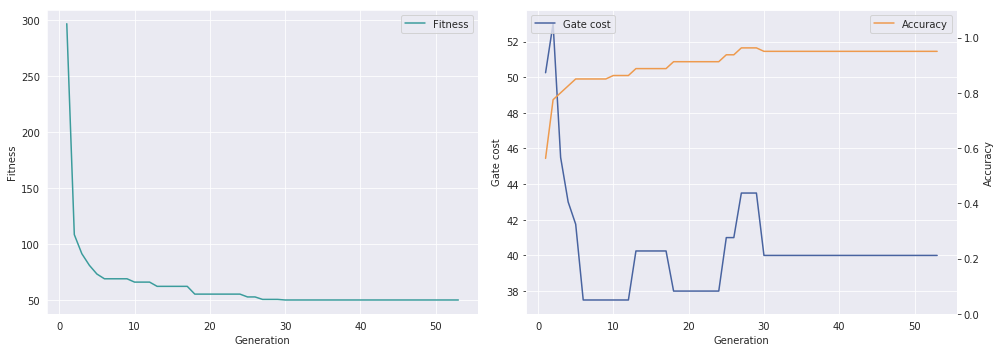

In [7]:
sns.set_style("darkgrid")
obj_x, obj_y1, obj_y2 = np.arange(len(obj_ACC)), np.array(obj_GATE), np.array(obj_ACC)
cost_x, cost_y = np.arange(len(obj_GATE)), np.array(COST)

fig, axes = plt.subplots(1,2, figsize=(14,5))

ax1=axes[1]
ax1.set_xlabel('Generation')
ax1.set_ylabel('Gate cost')
ax1.plot(obj_x+1, obj_y1, label="Gate cost", color="#4863A0")
ax1.tick_params(axis='y')

ax2 = ax1.twinx() 
ax2.set_ylabel('Accuracy')
ax2.plot(obj_x+1, obj_y2, label="Accuracy", color="#EE9A4D")
ax2.grid(False)
ax2.tick_params(axis='y')
ax2.set_ylim(0, 1.1)

ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

ax3=axes[0]
ax3.set_xlabel('Generation')
ax3.set_ylabel('Fitness')
ax3.plot(cost_x+1, cost_y, label="Fitness", color="#3B9C9C")
ax3.tick_params(axis='y')
ax3.legend(loc = "uppper right")

fig.tight_layout() 
plt.show()

R gate: 14 
H gate: 5 
CNOT gate: 3


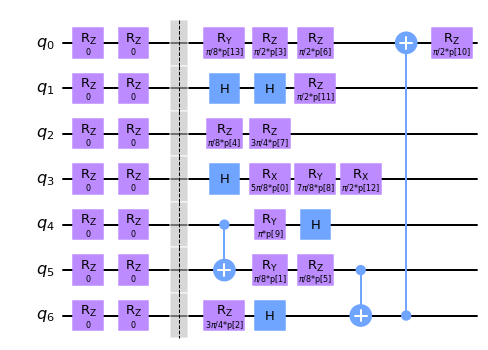

In [8]:
DISPLAY = 1
qc_display, r_display, h_display, cnot_display = generate_circuit_2local(pop[DISPLAY-1], QUBIT, FEATURE)
print("R gate:",r_display,"\nH gate:",h_display,"\nCNOT gate:",cnot_display)
qc_display.draw(output="mpl")

In [9]:
ga_kernel = QuantumKernel(feature_map=qc_display, quantum_instance=quantum_instance,)
model_ga = SVC(kernel=ga_kernel.evaluate)
qsvm = model_ga.fit(train_x, train_y)
q_score = model_ga.score(test_x, test_y)

print(f'Test kernel acc: {q_score}')

Test kernel acc: 1.0
